10
      question          worker  answer
0            1  A1AVJRFM6L0RN8      25
8            1  A3POYFULMTNW1H      25
1            1   ADAGUJNWMEPT6      80
2            1  A1LY3NJTYW9TFF       5
5            1  A1XUURRBT9RYFW      10
...        ...             ...     ...
6997       700  A2KBTYNGUFRB9N     -40
6999       700   ARQ4J4TLTPBNC    -100
6990       700  A1AVJRFM6L0RN8      65
6994       700  A1VYRD3HO2WDUN     -60
6991       700   ADAGUJNWMEPT6     -45

[6300 rows x 3 columns]
38 & 700 & 6300 & 165.79$\pm$202.2 & 9.0$\pm$0.0 & 884
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
18.062 14.774285714285714
t-test Ttest_relResult(statistic=9.415256615482408, pvalue=8.300052629027288e-21)
z-score -0.15916962390082742
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
18.062 13.642857142857142
t-test Ttest_relResult(statistic=13.510566524837941, pvalue=1.3872528382931632e-40)
z-score -0.22840288696001523
baseline below thresh 0.0
model belo

100%|██████████| 700/700 [00:02<00:00, 271.45it/s]


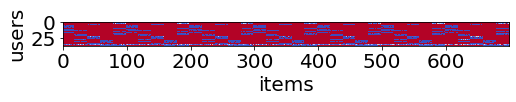

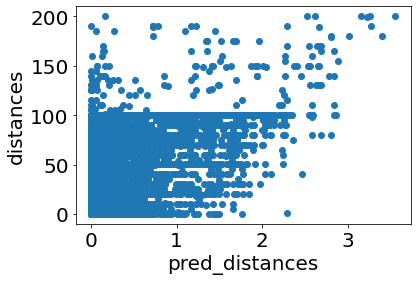

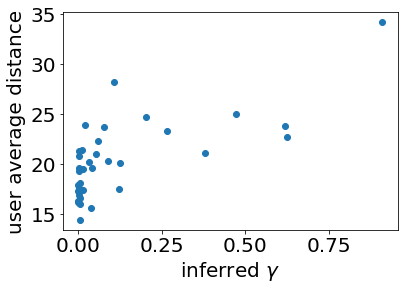

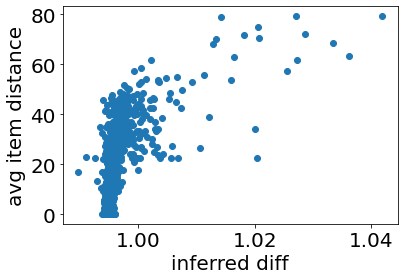

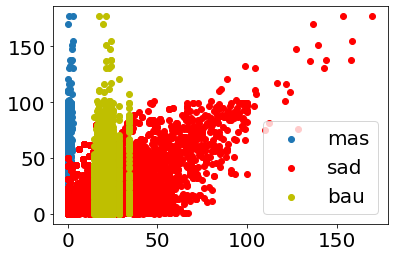

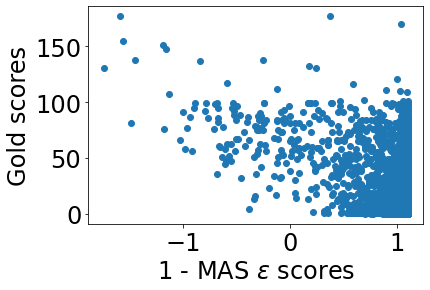

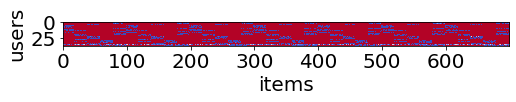

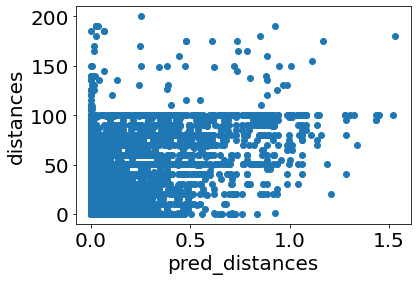

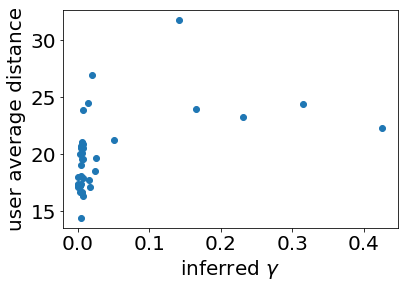

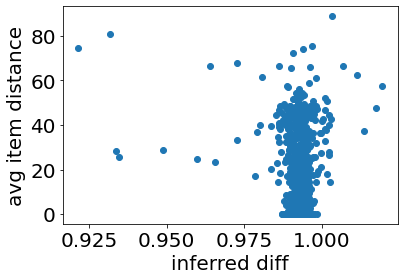

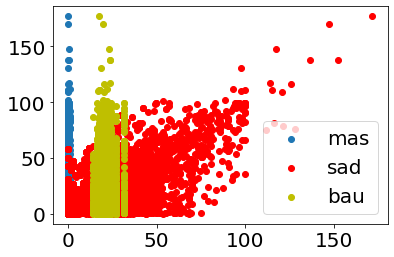

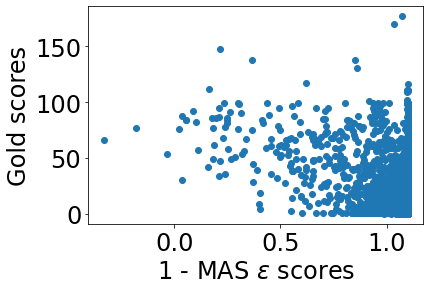

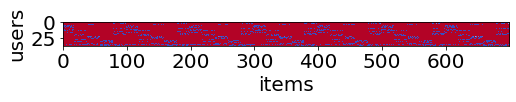

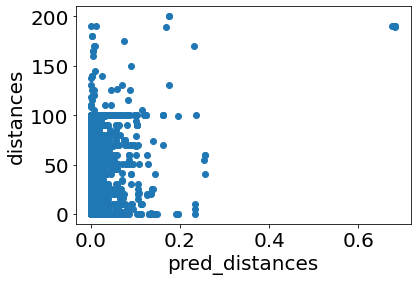

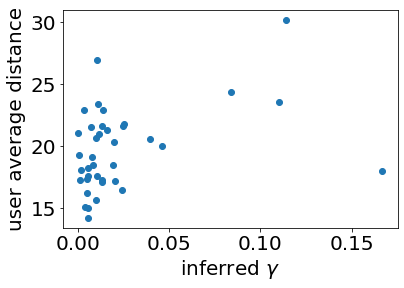

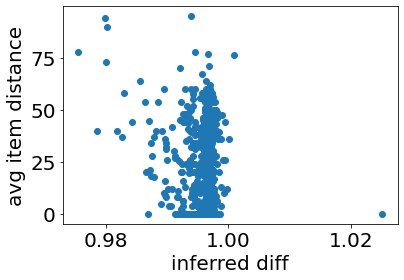

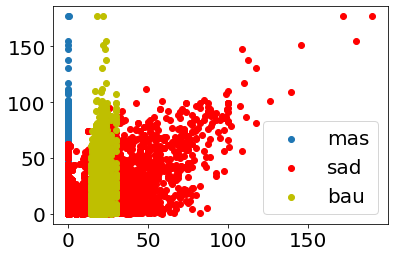

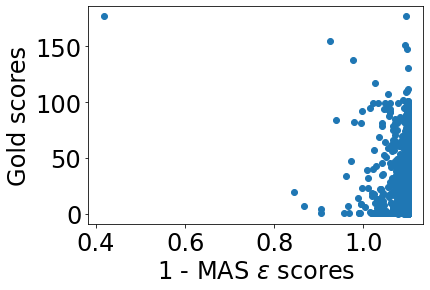

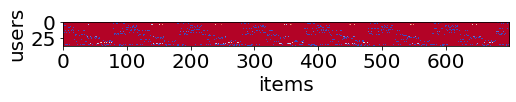

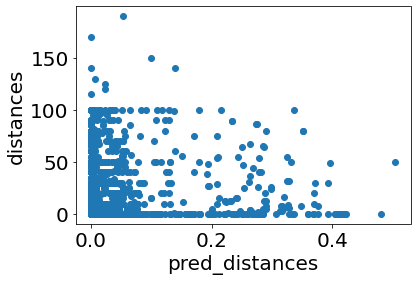

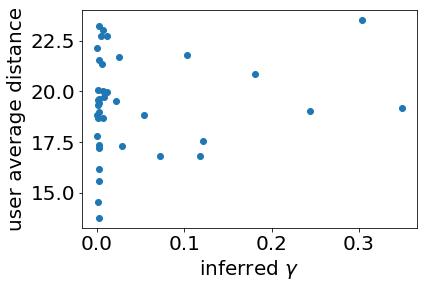

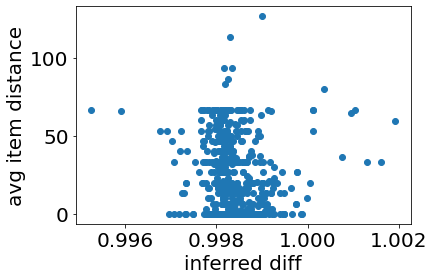

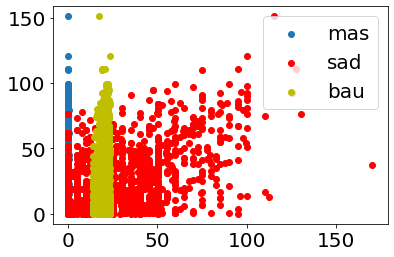

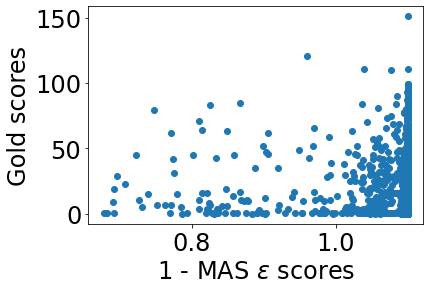

In [14]:

import itertools

import numpy
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

import experiments
import utils
from granularity import *
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, mean_absolute_error

input_df = pd.read_csv("data/answer_emotion.csv", sep=",")
truth_df = pd.read_csv("data/truth_emotion.csv")

annotation_df=DataFrame()
grouped_df = input_df.groupby('question')




minSamples=(numpy.min(input_df.groupby('question').size()))
print(minSamples)
dataRed = []
mae_SAD = []
mae_BAU = []
mae_MAS = []
rmse_SAD = []
rmse_BAU = []
rmse_MAS = []
mse_SAD = []
mse_BAU = []
mse_MAS = []



def grapher():


    for i in range(4):
        dataRed.append(int((minSamples-1)-(2*i)))

        annotation_df = DataFrame()
        for q in grouped_df.groups:
            annotation_df = annotation_df.append(grouped_df.get_group(q).sample(int((minSamples-1)-(2*i))))

        print(annotation_df)

        dist_fn = lambda x, y: abs(x - y)

        eval_fn = lambda x, y: abs(1 - dist_fn(x, y))

        temporal_exp = experiments.RealExperiment(eval_fn, "answer", "question", "worker", dist_fn)
        temporal_exp.setup(annodf=annotation_df, golddf=truth_df, c_anno_uid="worker", c_anno_item="question",
                       c_anno_label="answer",
                       c_gold_item="question", c_gold_label="truth")

        temporal_exp.describe_data()

        temporal_exp.train()

        temporal_exp.test(debug=True)
        _ = temporal_exp.debug(plot_vs_gold=True, skip_miniplots=True)

        rmse_MAS.append(numpy.sqrt(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.mas_preds.values()))))
        rmse_BAU.append(numpy.sqrt(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.bau_preds.values()))))
        rmse_SAD.append(numpy.sqrt(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.sad_preds.values()))))

        mse_MAS.append(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.mas_preds.values())))
        mse_BAU.append(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.bau_preds.values())))
        mse_SAD.append(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.sad_preds.values())))

        mae_MAS.append(mean_absolute_error(list(temporal_exp.golddict.values()), list(temporal_exp.mas_preds.values())))
        mae_BAU.append(mean_absolute_error(list(temporal_exp.golddict.values()), list(temporal_exp.bau_preds.values())))
        mae_SAD.append(mean_absolute_error(list(temporal_exp.golddict.values()), list(temporal_exp.sad_preds.values())))

    # dataRed.append(1)
    # annotation_df = input_df.groupby('question').agg(lambda x: x.sample(1))
    # mae_BAU.append(mean_absolute_error(list(truth_df['truth']),list(annotation_df['answer'])))    mae_SAD.append(mean_absolute_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # mae_MAS.append(mean_absolute_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # mse_BAU.append(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # mse_SAD.append(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # mse_MAS.append(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # rmse_BAU.append(numpy.sqrt(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer'])))))
    # rmse_SAD.append(numpy.sqrt(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer'])))))
    # rmse_MAS.append(numpy.sqrt(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer'])))))



grapher()



















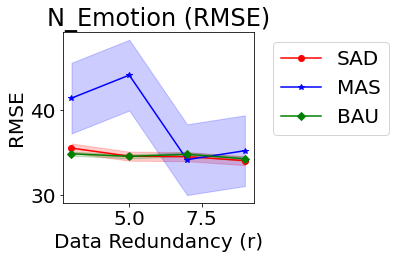

In [15]:

plt.plot(np.array(dataRed),np.array(rmse_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(rmse_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(rmse_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(rmse_SAD-np.std(rmse_SAD)),np.array(rmse_SAD+np.std(rmse_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(rmse_MAS-np.std(rmse_MAS)),np.array(rmse_MAS+np.std(rmse_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(rmse_BAU-np.std(rmse_BAU)),np.array(rmse_BAU+np.std(rmse_BAU)),alpha=0.2,color='g')


plt.title("N_Emotion (RMSE)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("RMSE")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('N_Emotion(RMSE).png')
plt.show()



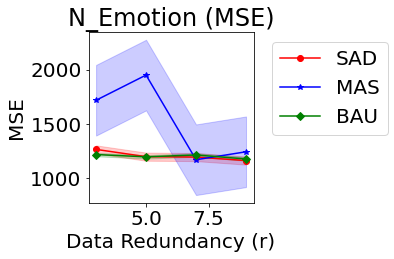

In [16]:


plt.plot(np.array(dataRed),np.array(mse_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(mse_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(mse_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(mse_SAD-np.std(mse_SAD)),np.array(mse_SAD+np.std(mse_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(mse_MAS-np.std(mse_MAS)),np.array(mse_MAS+np.std(mse_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(mse_BAU-np.std(mse_BAU)),np.array(mse_BAU+np.std(mse_BAU)),alpha=0.2,color='g')


plt.title("N_Emotion (MSE)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('N_Emotion(MSE).png')
plt.show()


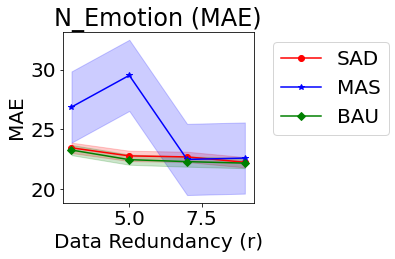

In [17]:

plt.plot(np.array(dataRed),np.array(mae_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(mae_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(mae_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(mae_SAD-np.std(mae_SAD)),np.array(mae_SAD+np.std(mae_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(mae_MAS-np.std(mae_MAS)),np.array(mae_MAS+np.std(mae_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(mae_BAU-np.std(mae_BAU)),np.array(mae_BAU+np.std(mae_BAU)),alpha=0.2,color='g')


plt.title("N_Emotion (MAE)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('N_Emotion(MAE).png')
plt.show()

